In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, precision_recall_curve, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Загружаем данные
df = pd.read_csv('grant_data_imb.csv')
df.head(10)

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,0,97A,30B,A,321024.0,50.0,321013.0,30.0,291502.0,20.0,...,2563.0,25.0,Yes,>10 to 15,2.0,6.0,3.0,5.0,15.0,3.0
1,0,36D,10A,G,300201.0,100.0,0.0,0.0,0.0,0.0,...,1038.0,1.0,NaN,Less than 0,0.0,3.0,0.0,4.0,0.0,0.0
2,0,317A,30D,NaN,321013.0,100.0,0.0,0.0,0.0,0.0,...,2763.0,25.0,Yes,>5 to 10,4.0,3.0,6.0,25.0,14.0,14.0
3,0,62B,10B,B,321103.0,30.0,321105.0,40.0,321204.0,30.0,...,2848.0,25.0,NaN,Less than 0,1.0,2.0,1.0,0.0,0.0,0.0
4,0,1A,10A,NaN,270603.0,60.0,321205.0,30.0,320603.0,10.0,...,2678.0,25.0,Yes,>5 to 10,5.0,14.0,0.0,9.0,7.0,0.0
5,1,4D,10A,F,321015.0,80.0,329903.0,10.0,320503.0,10.0,...,2813.0,25.0,NaN,>5 to 10,2.0,0.0,11.0,6.0,5.0,0.0
6,0,2B,10A,NaN,240301.0,90.0,240204.0,10.0,0.0,0.0,...,3198.0,31.0,Yes,>=0 to 5,0.0,2.0,5.0,7.0,1.0,1.0
7,0,2B,10A,D,260109.0,90.0,260301.0,10.0,0.0,0.0,...,3123.0,31.0,Yes,>5 to 10,1.0,0.0,11.0,2.0,15.0,0.0
8,0,4D,10A,NaN,320702.0,100.0,0.0,0.0,0.0,0.0,...,2713.0,25.0,Yes,>10 to 15,1.0,5.0,8.0,9.0,6.0,0.0
9,0,60D,30D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2653.0,25.0,NaN,>5 to 10,1.0,5.0,4.0,3.0,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Grant.Status                            4113 non-null   int64  
 1   Sponsor.Code                            3856 non-null   object 
 2   Grant.Category.Code                     3856 non-null   object 
 3   Contract.Value.Band...see.note.A        1953 non-null   object 
 4   RFCD.Code.1                             3853 non-null   float64
 5   RFCD.Percentage.1                       3853 non-null   float64
 6   RFCD.Code.2                             3853 non-null   float64
 7   RFCD.Percentage.2                       3853 non-null   float64
 8   RFCD.Code.3                             3853 non-null   float64
 9   RFCD.Percentage.3                       3853 non-null   float64
 10  RFCD.Code.4                             3853 non-null   floa

In [4]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Home.Language.1                           0.904206
Contract.Value.Band...see.note.A          0.525164
With.PHD.1                                0.433017
No..of.Years.in.Uni.at.Time.of.Grant.1    0.184537
Country.of.Birth.1                        0.161926
Faculty.No..1                             0.109166
Dept.No..1                                0.108923
Year.of.Birth.1                           0.070022
Person.ID.1                               0.069779
C.1                                       0.069779
Number.of.Successful.Grant.1              0.069779
Number.of.Unsuccessful.Grant.1            0.069779
A..1                                      0.069779
A.1                                       0.069779
B.1                                       0.069779
SEO.Code.4                                0.067104
SEO.Percentage.5                          0.067104
SEO.Code.5                                0.067104
SEO.Percentage.4                          0.067104
SEO.Percentage.3               

8 признаков типа object, все остальные численные. Больше всего пропусков в следующих столбцах:

1. Home.Language.1      90% (категориальная)
2. Contract.Value.Band...see.note.A    53%  (категориальная)
3. With.PHD.1       43%     (категориальная)
4. Country.of.Birth.1   16%     (категориальная)
5. Faculty.No..1  11%   (численная)
6. Dept.No..1   11%     (численная)

У остальных признаков пропусков порядка 7% и меньше. 

In [5]:
# Посмотрим вручную, какие значения принимают фичи с наибольшим количеством пропусков

top_na = (df.isna().sum()/df.shape[0]).sort_values(ascending=False)[0:5].index

for element in top_na:
    print(f'Процент пропусков {(df.isna().sum()/df.shape[0]).sort_values(ascending=False)[element]}')
    display(df[element].value_counts())

Процент пропусков 0.9042061755409677


Home.Language.1
English    316
Other       78
Name: count, dtype: int64

Процент пропусков 0.5251641137855579


Contract.Value.Band...see.note.A
A     961
B     305
C     159
D     151
G     135
E      98
F      75
H      33
J      18
I      11
P       2
K       1
M       1
O       1
Q       1
L       1
Name: count, dtype: int64

Процент пропусков 0.43301726233892535


With.PHD.1
Yes     2332
Name: count, dtype: int64

Процент пропусков 0.18453683442742524


No..of.Years.in.Uni.at.Time.of.Grant.1
>=0 to 5        1337
>5 to 10         739
Less than 0      496
>10 to 15        418
more than 15     364
Name: count, dtype: int64

Процент пропусков 0.16192560175054704


Country.of.Birth.1
Australia                 2530
Great Britain              304
Western Europe             158
Asia Pacific               149
North America              121
Eastern Europe              60
Middle East and Africa      40
The Americas                32
New Zealand                 31
South Africa                22
Name: count, dtype: int64

In [6]:
# Выведем все категориальные переменные, по которым есть пропуски

for header in df.columns:
    if df[header].dtype == 'object' and df.isna().sum()[header] != 0:
        display(df[header].value_counts())

Sponsor.Code
4D      1006
2B       915
21A      375
24D      114
40D       91
        ... 
242B       1
308D       1
284D       1
259C       1
225A       1
Name: count, Length: 226, dtype: int64

Grant.Category.Code
10A    2050
30B     707
50A     375
10B     211
20C     180
30C     147
30D      93
20A      49
30G      35
30E       5
30A       2
40C       1
30F       1
Name: count, dtype: int64

Contract.Value.Band...see.note.A
A     961
B     305
C     159
D     151
G     135
E      98
F      75
H      33
J      18
I      11
P       2
K       1
M       1
O       1
Q       1
L       1
Name: count, dtype: int64

Role.1
CHIEF_INVESTIGATOR         3640
EXT_CHIEF_INVESTIGATOR      230
PRINCIPAL_SUPERVISOR        144
DELEGATED_RESEARCHER         36
STUD_CHIEF_INVESTIGATOR      10
HONVISIT                      6
EXTERNAL_ADVISOR              1
Name: count, dtype: int64

Country.of.Birth.1
Australia                 2530
Great Britain              304
Western Europe             158
Asia Pacific               149
North America              121
Eastern Europe              60
Middle East and Africa      40
The Americas                32
New Zealand                 31
South Africa                22
Name: count, dtype: int64

Home.Language.1
English    316
Other       78
Name: count, dtype: int64

With.PHD.1
Yes     2332
Name: count, dtype: int64

No..of.Years.in.Uni.at.Time.of.Grant.1
>=0 to 5        1337
>5 to 10         739
Less than 0      496
>10 to 15        418
more than 15     364
Name: count, dtype: int64

In [7]:
# Заполним все пропуски в численных столбцах

df_cleaned_avg = df.copy()
df_cleaned_0 = df.copy()

for header in df.columns:
    if df[header].dtype != 'object' and df.isna().sum()[header] != 0:
        df_cleaned_0[header] = df[header].fillna(0)
        df_cleaned_avg[header] = df[header].fillna(df[header].mean())

Особой логики в заполнении пропусков категориальных переменных я не увидел.
Только отсутствие данных в 'With.PHD.1' можно проинтерпретировать как 'No'.
Поэтому в категориальных переменных я заполню все пропуски значением по умолчанию 'NoData' 

In [8]:
for header in df.columns:
    if df[header].dtype == 'object' and df.isna().sum()[header] != 0:
        df_cleaned_0[header] = df[header].fillna('NoData')
        df_cleaned_avg[header] = df[header].fillna('NoData')

In [9]:
# Сохраняем очищенные датасеты
df_cleaned_0.to_csv('grant_data_cleaned_0.csv')
df_cleaned_avg.to_csv('grant_data_cleaned_avg.csv')

df = df_cleaned_avg.copy()

In [10]:
# Преобразуем категориальные признаки в количественные
df = pd.get_dummies(df, drop_first=True)

In [11]:
# Разделяем данные
features = df.drop('Grant.Status', axis = 1)
target = df['Grant.Status']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state = 2)

# Масштабируем данные
scaler = StandardScaler()
scaler.fit(features_train)
features_train_sc = scaler.transform(features_train)
features_test_sc = scaler.transform(features_test)

Grant.Status
0    0.792366
1    0.207634
Name: proportion, dtype: float64

Grant.Status
0    0.796657
1    0.203343
Name: proportion, dtype: float64

Grant.Status
0    0.775213
1    0.224787
Name: proportion, dtype: float64

<Axes: >

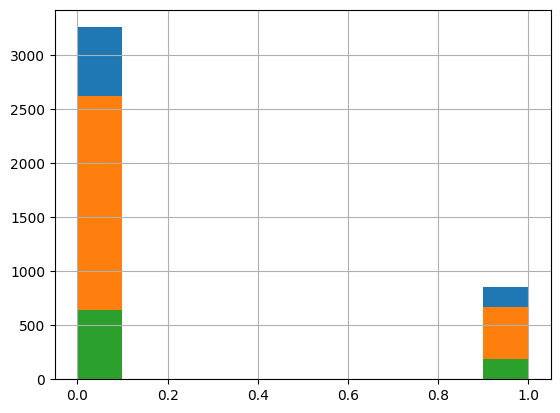

In [12]:
# Изучаем сбалансированность целевой переменной
display(target.value_counts(normalize=True))
target.hist()

display(target_train.value_counts(normalize=True))
target_train.hist()

display(target_test.value_counts(normalize=True))
target_test.hist()

# Данные несбалансированы

In [13]:
# Обучаем логистическую регрессию с кросс-валидацией в качестве solver'a 'liblinear'
# Датасет относительно небольшой, как и в обучалке выберем 'liblinear'

model = LogisticRegressionCV(solver = 'liblinear', random_state=2, class_weight='balanced', cv = 10)
model.fit(features_train_sc, target_train)

LogisticRegressionCV(class_weight='balanced', cv=10, random_state=2,
                     solver='liblinear')

In [14]:
# Посмотрим на стандартные метрики
print(classification_report(target_train, model.predict(features_train_sc)))
print(classification_report(target_test, model.predict(features_test_sc)))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2621
           1       0.62      0.90      0.73       669

    accuracy                           0.87      3290
   macro avg       0.80      0.88      0.82      3290
weighted avg       0.90      0.87      0.88      3290

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       638
           1       0.54      0.76      0.63       185

    accuracy                           0.80       823
   macro avg       0.73      0.79      0.75       823
weighted avg       0.83      0.80      0.81       823



In [15]:
print(f'ROC-AUC на тренировочной выборке {roc_auc_score(target_train, model.predict_proba(features_train_sc)[:, 1])}')
print(f'ROC-AUC на тестовой выборке {roc_auc_score(target_test, model.predict_proba(features_test_sc)[:, 1])}')

ROC-AUC на тренировочной выборке 0.9384450303373523
ROC-AUC на тестовой выборке 0.8506227230365162


In [16]:
df_most_imp = pd.DataFrame(
    zip(list(features.columns), list(abs(model.coef_[0]))), 
    columns=['feature', 'importance']
).sort_values(by=['importance'], ascending=False)[:10]

display(df_most_imp)

df_imp = pd.DataFrame(
    zip(list(features.columns), list(model.coef_[0])), 
    columns=['feature', 'importance']
)

df_imp[df_imp.feature.isin(df_most_imp['feature'])]

,feature,importance
25,Number.of.Unsuccessful.Grant.1,1.523277
281,Contract.Value.Band...see.note.A_NoData,1.401400
24,Number.of.Successful.Grant.1,1.111316
232,Sponsor.Code_6B,0.681969
277,Contract.Value.Band...see.note.A_J,0.519279
136,Sponsor.Code_24D,0.485445
247,Sponsor.Code_89A,0.441857
187,Sponsor.Code_33A,0.387633
206,Sponsor.Code_42B,0.380419
255,Sponsor.Code_NoData,0.379482


,feature,importance
24,Number.of.Successful.Grant.1,1.111316
25,Number.of.Unsuccessful.Grant.1,-1.523277
136,Sponsor.Code_24D,-0.485445
187,Sponsor.Code_33A,-0.387633
206,Sponsor.Code_42B,-0.380419
232,Sponsor.Code_6B,-0.681969
247,Sponsor.Code_89A,-0.441857
255,Sponsor.Code_NoData,0.379482
277,Contract.Value.Band...see.note.A_J,-0.519279
281,Contract.Value.Band...see.note.A_NoData,-1.401400


С precision на целевом классе всё совсем плохо. Возможно случайный лес справится лучше.

In [17]:
# Обучим дефолтный случайный лес
model = RandomForestClassifier(random_state=2)
model.fit(features_train_sc, target_train)

RandomForestClassifier(random_state=2)

In [18]:
# Посмотрим на стандартные метрики
print(classification_report(target_train, model.predict(features_train_sc)))
print(classification_report(target_test, model.predict(features_test_sc)))

print(f'ROC-AUC на тренировочной выборке {roc_auc_score(target_train, model.predict_proba(features_train_sc)[:, 1])}')
print(f'ROC-AUC на тестовой выборке {roc_auc_score(target_test, model.predict_proba(features_test_sc)[:, 1])}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2621
           1       1.00      1.00      1.00       669

    accuracy                           1.00      3290
   macro avg       1.00      1.00      1.00      3290
weighted avg       1.00      1.00      1.00      3290

              precision    recall  f1-score   support

           0       0.86      0.97      0.92       638
           1       0.84      0.47      0.60       185

    accuracy                           0.86       823
   macro avg       0.85      0.72      0.76       823
weighted avg       0.86      0.86      0.84       823

ROC-AUC на тренировочной выборке 0.9999957227156308
ROC-AUC на тестовой выборке 0.915631619079895


Precision лучше, recall хуже, метрика чуть хуже, ROC-AUC существенно лучше, но имеет место явное переобучение.

In [19]:
# Важность признаков
df_most_imp = pd.DataFrame(
    zip(list(features.columns), list(abs(model.feature_importances_))), 
    columns=['feature', 'importance']
).sort_values(by=['importance'], ascending=False)[:10]

display(df_most_imp)

,feature,importance
25,Number.of.Unsuccessful.Grant.1,0.119884
281,Contract.Value.Band...see.note.A_NoData,0.069522
24,Number.of.Successful.Grant.1,0.047069
0,RFCD.Code.1,0.040336
10,SEO.Code.1,0.036759
22,Dept.No..1,0.035279
20,Person.ID.1,0.033580
27,A.1,0.028859
26,A..1,0.027330
28,B.1,0.025437


Вывод: 

Результаты по roc_auc_score:

1. Логистическая регрессия -- 0,851
2. Дефолтный случайный лес -- 0,917

С точки зрения auc более предпочтительным является случайный лес.

С точки зрения логистической регрессии самыми важными признаками являются:

1.	Number.of.Unsuccessful.Grant.1	(количество успешных заявок на грант)
2.	Contract.Value.Band...see.note.A_NoData	(заявки, для которых по фиче 'Contract.Value.Band...see.note.A' нет данных)
3.	Number.of.Successful.Grant.1 (количество неуспешных заявок на грант)

С точки зрения случайного леса самыми важными признаками являются:

1.	Number.of.Unsuccessful.Grant.1	
2.	Contract.Value.Band...see.note.A_NoData
3.	Number.of.Successful.Grant.1

В первых трёх самых важных фичах эти модели совпадают. Далее наблюдаются различия. Логистическая регрессия сильнее учитывает значения фичи 'Sponsor.Code', случайный лес отдаёт предпочтение другим переменным (см. выше). Ожидаемо количество успешных заявок на грант положительно влияет на одобрение новой заявки, количество неуспешных заявок на грант отрицательно влияет на одобрение новой заявки. 
